In [1]:
from data import load_data
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from tslearn.datasets import UCR_UEA_datasets
from ClassificationModels.ResNet import Classifier_RESNET
from ClassificationModels.CNN import Classifier_CNN

2022-06-08 16:29:15.141822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-08 16:29:15.141837: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Parameters

In [2]:
dataset='BasicMotions'#'GunPoint'

# Load Data

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)


In [4]:
#enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
#pickle.dump(enc1,open(f'./ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))
enc1=pickle.load(open(f'./ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Model Training

In [5]:
import tensorflow as tf 


#model = Classifier_CNN(f'./ClassificationModels/models/{dataset}', (train_x.shape[1], train_x.shape[2]), train_y.shape[-1], True)
#y_true = np.argmax(test_y, axis=1)
#model.fit(train_x,train_y,test_x,test_y)

model_to_explain = tf.keras.models.load_model(f'./ClassificationModels/models/{dataset}/cnn/{dataset}best_model.hdf5')

2022-06-08 16:29:16.294044: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-06-08 16:29:16.331567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 16:29:16.331820: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro T1000 computeCapability: 7.5
coreClock: 1.455GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 119.24GiB/s
2022-06-08 16:29:16.331903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-08 16:29:16.331963: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcubl

# Explanation Algo

In [6]:
from InterpretabilityModels.IsmailEtAl.SaliencyMethodsTF import Saliency_TF
int_mod=Saliency_TF(model_to_explain, train_x.shape[-2],train_x.shape[-1], method='IG',mode='time')

NumTImeSteps 100
NumFeatures 6


In [7]:
print(np.array([test_x[0,:,:]]).shape)

(1, 100, 6)


In [8]:
item= np.array([test_x[0,:,:]])
label=int(np.argmax(test_y[0]))


In [9]:
#TODO TSR = True
exp=int_mod.explain(item,labels=label,TSR = True)

(1, 100, 6, 1)
sequence length 100
inpu size 6
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)


2022-06-08 16:29:16.826296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-08 16:29:16.827353: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2599990000 Hz


(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 6, 100)
(100, 6)
(1, 

# Plot Item 

time mode
(1, 100, 6)
(1, 6, 100)
(100, 6)
(6, 100)


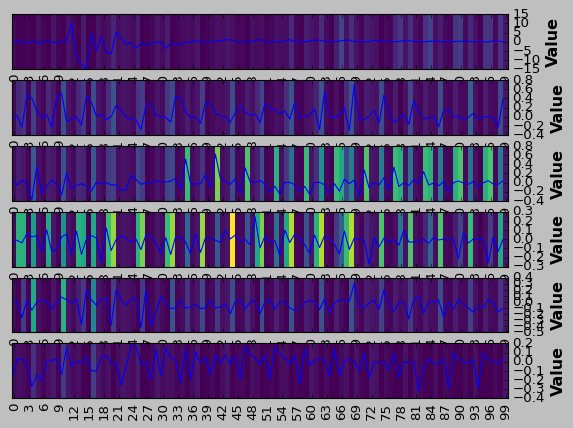

In [10]:
%matplotlib inline  
int_mod.plot(np.array([test_x[0,:,:]]),exp)

time mode
(1, 100, 6)
(1, 6, 100)
(100, 6)
(6, 100)


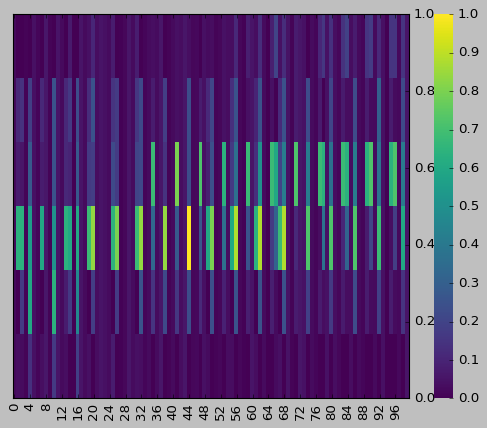

In [11]:
%matplotlib inline  
int_mod.plot(np.array([test_x[0,:,:]]),exp, heatmap = True)